### TD : Réseau Sémantique
#### Réalisé par : Mohamed Rida Lajghal  IID3

In [ ]:
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

## Exercice 1 :
On dispose des faits suivants :
* Un oiseau est un animal qui peut voler.
* Un mammifère est un animal qui allaite ses petits.
* Une chauve-souris est à la fois un mammifère et un oiseau.
* Les chauves-souris ne pondent pas d’œufs.

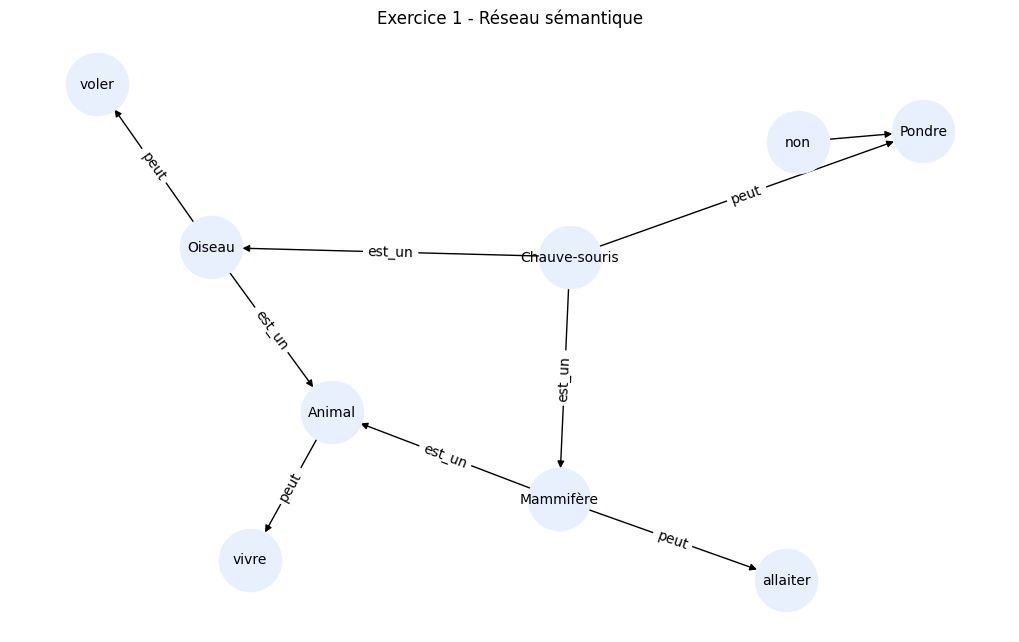

In [51]:
G = nx.DiGraph()

# Classes
G.add_node("Animal")
G.add_node("Oiseau")
G.add_node("Mammifère")
G.add_node("Chauve-souris")

# Relations d'héritage
G.add_edge("Oiseau", "Animal", relation="est_un")
G.add_edge("Mammifère", "Animal", relation="est_un")
G.add_edge("Chauve-souris", "Oiseau", relation="est_un")
G.add_edge("Chauve-souris", "Mammifère", relation="est_un")

# Attributs
G.add_edge("Animal", "vivre", relation="peut")
G.add_edge("Oiseau", "voler", relation="peut")
G.add_edge("Mammifère", "allaiter", relation="peut")
G.add_edge("Chauve-souris", "Pondre", relation="peut")

# Negations
G.add_node('non')
G.add_edge('non','Pondre', relatio="ne_peut_pas")

# --- Affichage ---
pos = nx.spring_layout(G, seed=3)

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, arrows=True,node_color="#E8F0FE", node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Exercice 1 - Réseau sémantique")
plt.show()

## Exercice 2 :
On a les règles suivantes :
* Tous les poissons vivent dans l’eau.
* Tous les animaux qui vivent dans l’eau peuvent nager.
* Les dauphins sont des mammifères.
* Les mammifères sont des animaux.
* Les dauphins vivent dans l’eau.

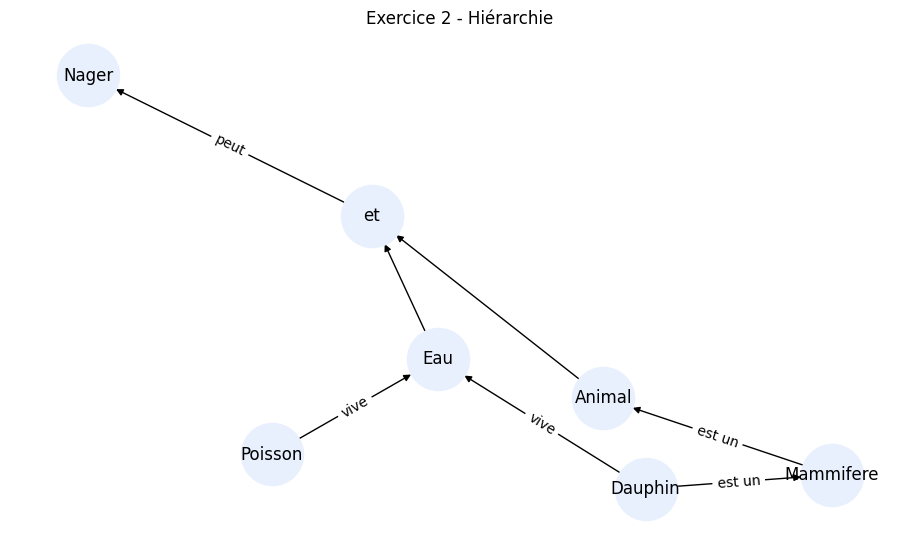

In [ ]:
G = nx.DiGraph()

# Classes
G.add_node('Animal')
G.add_node('Poisson')
G.add_node('Mammifere')
G.add_node('Dauphin')
G.add_node("Eau")
G.add_node('Nager')
G.add_node('et')

# Relations "est un"
G.add_edge('Poisson',"Eau", relation='vive')
G.add_edge('Dauphin',"Eau", relation='vive')
G.add_edge('Dauphin','Mammifere', relation='est un')
G.add_edge('Mammifere','Animal', relation='est un')

# Connecteur logique "et" 
G.add_edge("Eau",'et', relation='')
G.add_edge('Animal','et', relation='')

# Relation du connecteur "et" vers la propriété
G.add_edge('et','Nager', relation='peut')

pos = nx.spring_layout(G, seed=3)

plt.figure(figsize=(9,5))
nx.draw(G, pos, with_labels=True, node_color="#E8F0FE" , node_size=2000, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Exercice 2 - Hiérarchie")
plt.show()

## Exercice 3 :
On veut représenter :
* Une personne possède un âge (valeur numérique).
* Un étudiant est une personne qui étudie un domaine.
* Un enseignant est une personne qui enseigne un domaine.
* Un professeur est à la fois enseignant et chercheur.
* Le domaine enseigné doit être le même que le domaine étudié pour un même cours.

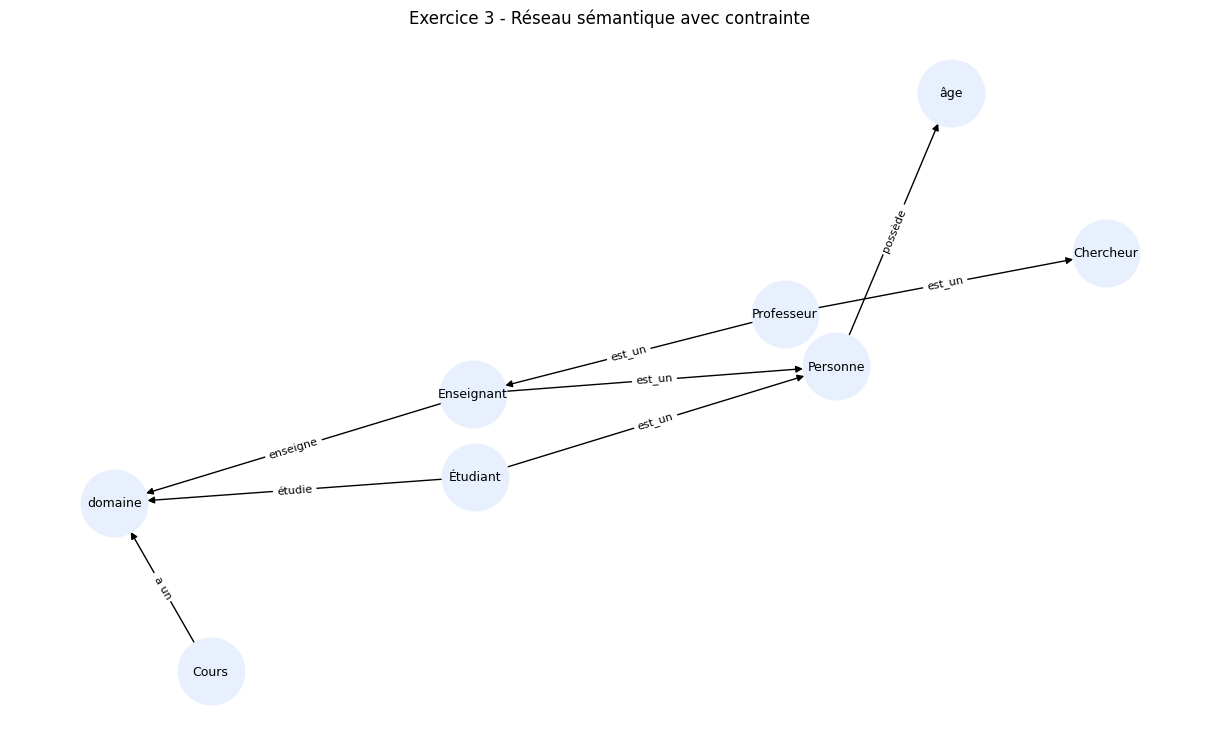

In [ ]:
G = nx.DiGraph()

# --- Nœuds ---
G.add_node("Personne")
G.add_node("Étudiant")
G.add_node("Enseignant")
G.add_node("Professeur")
G.add_node('Chercheur')
G.add_node("âge")
G.add_node("domaine")
G.add_node('Cours')

# --- Relations d'héritage ---
G.add_edge("Étudiant", "Personne", relation="est_un")
G.add_edge("Enseignant", "Personne", relation="est_un")
G.add_edge("Professeur", "Enseignant", relation="est_un")
G.add_edge("Professeur", 'Chercheur', relation="est_un")
G.add_edge('Cours','domaine', relation='a un')

# --- Relations attributaires ---
G.add_edge("Personne", "âge", relation="possède")
G.add_edge("Étudiant", "domaine", relation="étudie")
G.add_edge("Enseignant", "domaine", relation="enseigne")

# --- Affichage ---
plt.figure(figsize=(12,7))
pos = nx.spring_layout(G, seed=41)

nx.draw(G, pos, with_labels=True,node_color="#E8F0FE", node_size=2300, arrows=True, font_size=9)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Exercice 3 - Réseau sémantique avec contrainte")
plt.show()

## Exercice 4 :
On construit le réseau suivant :
* Chien → est un → Animal
* Chat → est un → Animal
* Animal → est un → ÊtreVivant
* Chien → lié À → Os
* Chat → lié À → Lait
* Os → type → Nourriture

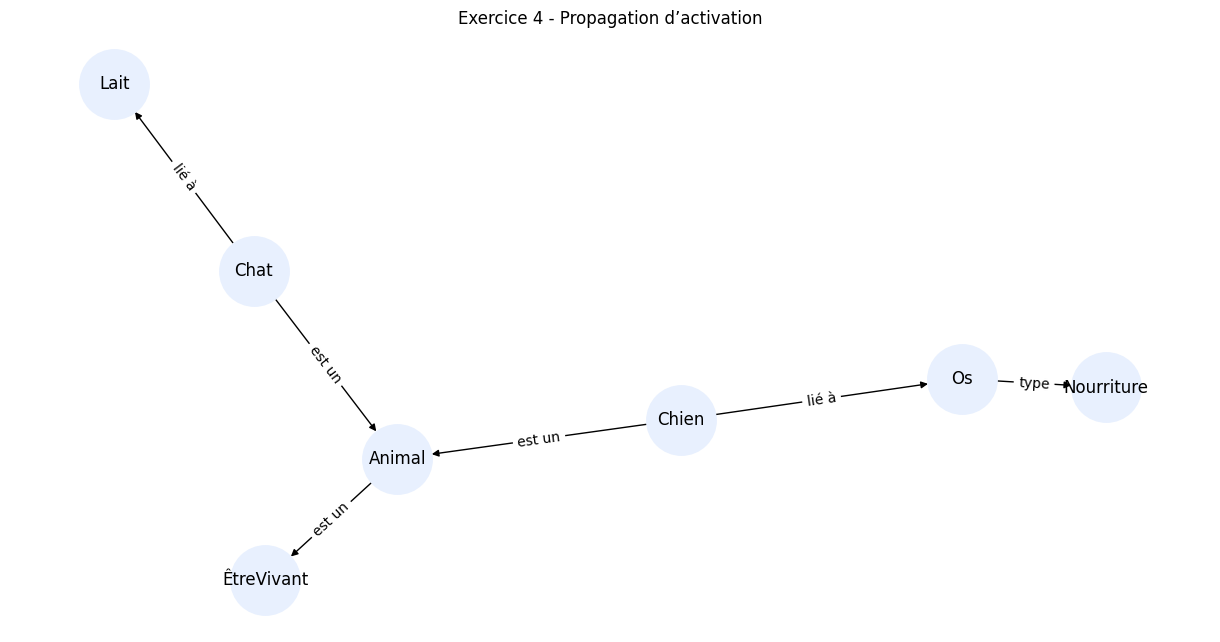

{'Chien': 1.0,
 'Chat': 0.0,
 'Animal': 0.5,
 'ÊtreVivant': 0.25,
 'Os': 0.5,
 'Lait': 0.0,
 'Nourriture': 0.25}

In [ ]:
G = nx.DiGraph()

# Nœuds
G.add_nodes_from(["Chien", "Chat", "Animal", "ÊtreVivant", "Os", "Lait", "Nourriture"])

# Liens "est un"
G.add_edge("Chien", "Animal", relation="est un")
G.add_edge("Chat", "Animal", relation="est un")
G.add_edge("Animal", "ÊtreVivant", relation="est un")

# Liens "lié à"
G.add_edge("Chien", "Os", relation="lié à")
G.add_edge("Chat", "Lait", relation="lié à")

# Type
G.add_edge("Os", "Nourriture", relation="type")


# 2) Propagation d'activation

activation = {node: 0.0 for node in G.nodes()}
activation["Chien"] = 1.0   # activation initiale

niveau_max = 3
facteur = 0.5

for niveau in range(1, niveau_max + 1):
    new_activation = activation.copy()
    for node in G.nodes():
        if activation[node] > 0:
            for voisin in G.successors(node):
                added = activation[node] * facteur
                new_activation[voisin] = max(new_activation[voisin], added)
    activation = new_activation

# 3) Affichage du graphe-
plt.figure(figsize=(12,6))
pos = nx.spring_layout(G, seed=3)

nx.draw(G, pos, with_labels=True, node_size=2500, node_color="#E8F0FE", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Exercice 4 - Propagation d’activation")
plt.show()

# 4) Affichage des activations finales
activation

## Exercice 5 :
* Les oiseaux peuvent voler.
* Les oiseaux nocturnes chassent la nuit.
* Les hiboux sont des oiseaux nocturnes.
* Les pingouins sont des oiseaux mais ne volent pas.
* Les hiboux ne vivent pas dans l’eau.

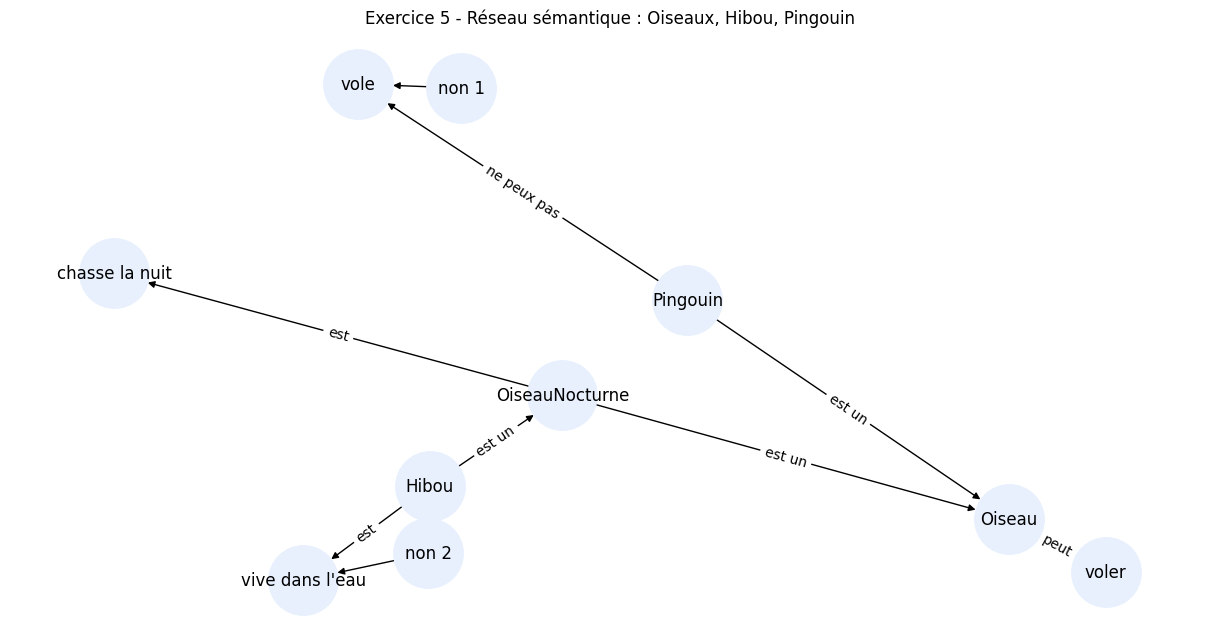

In [85]:
G = nx.DiGraph()

# Classes
G.add_node("Oiseau")
G.add_node("OiseauNocturne")
G.add_node("Hibou")
G.add_node("Pingouin")

# Propriétés
G.add_node("voler")
G.add_node("chasse la nuit")
G.add_node("voler")

# Liens "est un"
G.add_edge("OiseauNocturne", "Oiseau", relation="est un")
G.add_edge("Hibou", "OiseauNocturne", relation="est un")
G.add_edge("Pingouin", "Oiseau", relation="est un")

# Propriétés des classes
G.add_edge("Oiseau", "voler", relation="peut")
G.add_edge("OiseauNocturne", "chasse la nuit", relation="est")

# Exceptions
G.add_edge("Pingouin", "vole", relation="ne peux pas")
G.add_edge("Hibou", "vive dans l'eau", relation="est")

# Negations
G.add_node('non 1')
G.add_edge('non 1','vole', relatio="ne_peut_pas")

G.add_node('non 2')
G.add_edge('non 2',"vive dans l'eau", relatio="ne_peut_pas")

# --- Affichage ---
plt.figure(figsize=(12,6))
pos = nx.spring_layout(G, seed=26)

nx.draw(G, pos, with_labels=True, node_size=2500, node_color="#E8F0FE", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Exercice 5 - Réseau sémantique : Oiseaux, Hibou, Pingouin")
plt.show()

## Exercice 6 :
Traduisez en réseau sémantique :
* (∀x) Étudiant(x) → Personne(x)
* (∀x) Étudiant(x) → ¬Travailleur(x)
* Étudiant(Ali)

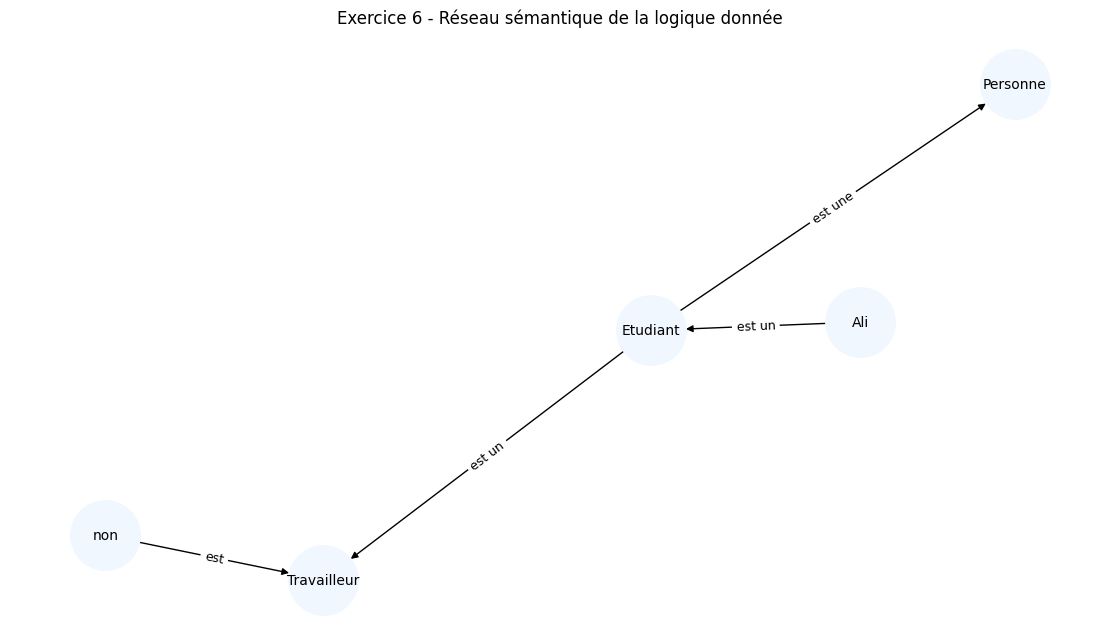

In [ ]:
G = nx.DiGraph()

# Classes
G.add_node('Personne')
G.add_node('Etudiant')
G.add_node('Travailleur')
G.add_node('Ali')

# Relations
G.add_edge('Etudiant','Personne', relation='est une')
G.add_edge('Etudiant','Travailleur', relation='est un')
G.add_edge('non','Travailleur', relation='est')
G.add_edge('Ali','Etudiant', relation='est un')

# negation
G.add_node('non')
G.add_edge('non','Travailleur', relation='est')

# Affichage du réseau
plt.figure(figsize=(11, 6))
pos = nx.spring_layout(G, seed=4)

nx.draw(G, pos,with_labels=True,node_size=2500,node_color="#F1F7FF",arrows=True,font_size=10)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Exercice 6 - Réseau sémantique de la logique donnée")
plt.show()

## Exercice 7 :
Dans un réseau médical simplifié :
* Fièvre → symptôme → Maladie
* Toux → symptôme → MaladieRespiratoire
* Grippe → isa → MaladieRespiratoire
* Grippe → hasSymptom → Fièvre, Toux
* Pneumonie → isa → MaladieRespiratoire
* Pneumonie → hasSymptom → Fièvre, DouleurPoitrine

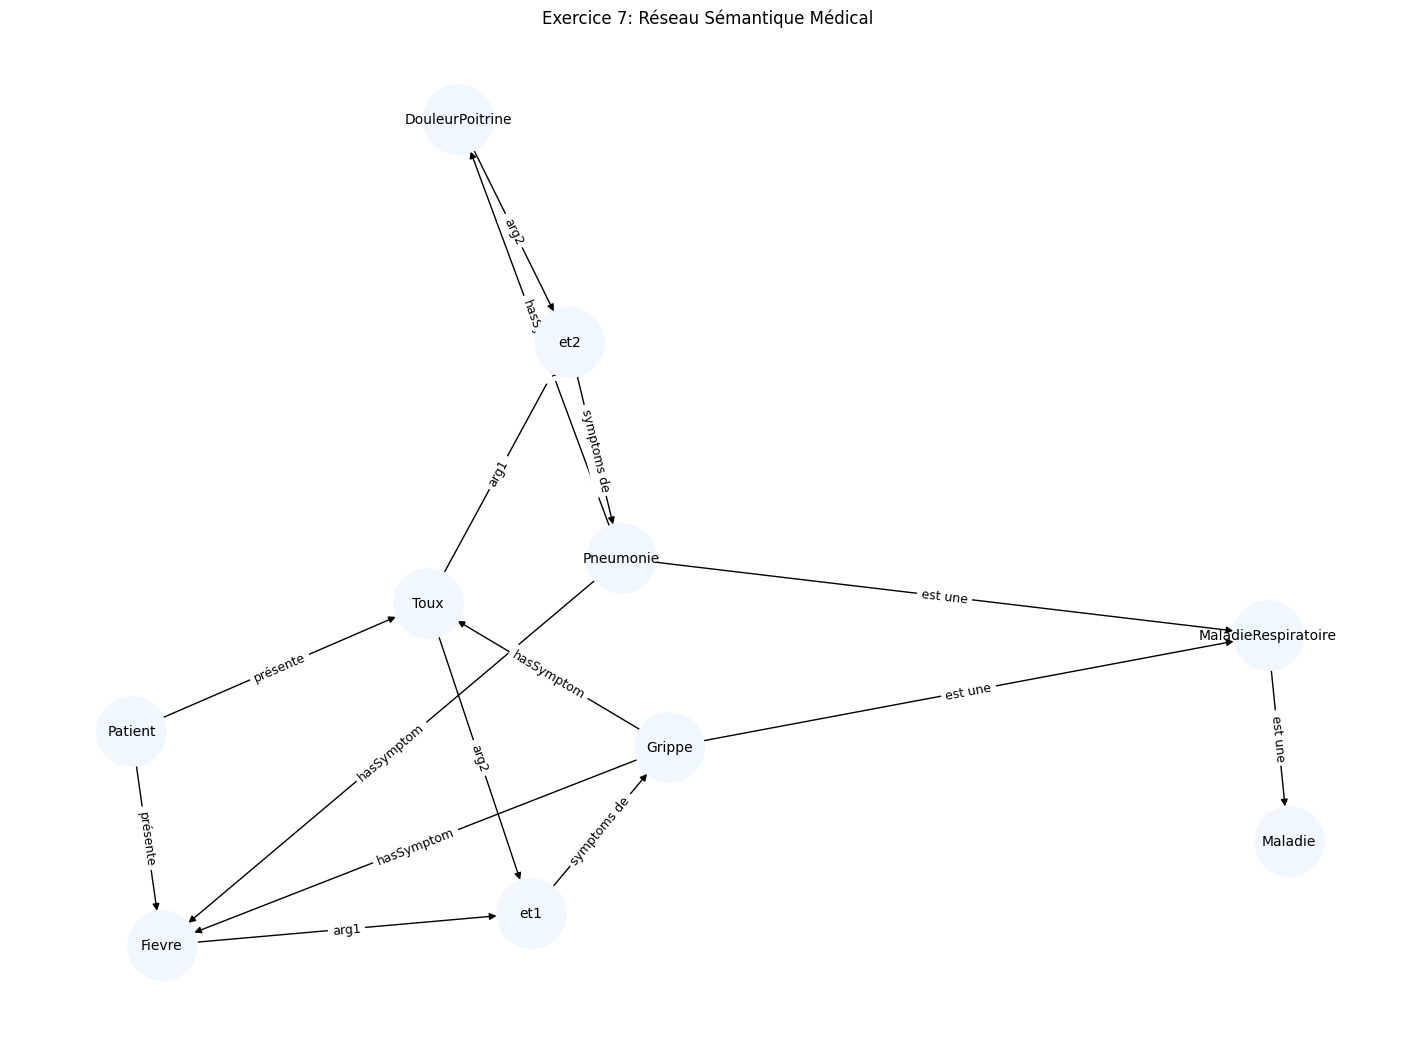

In [92]:
G = nx.DiGraph()

# Noeuds - Hiérarchie des maladies
G.add_node('Maladie')
G.add_node('MaladieRespiratoire')
G.add_node('Grippe')
G.add_node('Pneumonie')

# Noeuds - Symptômes
G.add_node('Fievre')
G.add_node('Toux')
G.add_node('DouleurPoitrine')

# Noeuds - Patient et connecteurs
G.add_node('Patient')
G.add_node('et1', kind='connector', label='ET')
G.add_node('et2', kind='connector', label='ET')

# Relations hiérarchiques
G.add_edge('MaladieRespiratoire','Maladie', relation='est une')
G.add_edge('Grippe','MaladieRespiratoire', relation='est une')
G.add_edge('Pneumonie','MaladieRespiratoire', relation='est une')

# Relations symptômes des maladies
G.add_edge('Grippe','Fievre', relation='hasSymptom')
G.add_edge('Grippe','Toux', relation='hasSymptom')
G.add_edge('Pneumonie','Fievre', relation='hasSymptom')
G.add_edge('Pneumonie','DouleurPoitrine', relation='hasSymptom')

# Patient présente des symptômes
G.add_edge('Patient','Fievre', relation='présente')
G.add_edge('Patient','Toux', relation='présente')

# Règles de diagnostic
G.add_edge('Fievre','et1', relation='arg1')
G.add_edge('Toux','et1', relation='arg2')
G.add_edge('et1','Grippe', relation='symptoms de')

G.add_edge('Toux','et2', relation='arg1')
G.add_edge('DouleurPoitrine','et2', relation='arg2')
G.add_edge('et2','Pneumonie', relation='symptoms de')


# Visualisation
plt.figure(figsize=(14,10))
pos = nx.spring_layout(G, seed=4)

nx.draw(G, pos,with_labels=True,node_size=2500,node_color="#F1F7FF",arrows=True,font_size=10)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Exercice 7: Réseau Sémantique Médical ')
plt.show()
